# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Josua Pane - 1301210254
2. Rashad Izza Andredi - 1301213309
3. Rivan Fauzan - 1301210554


#### Latar Belakang
Dalam dunia Pembelajaran Mesin, metode ensemble telah terbukti efektif dalam meningkatkan akurasi dan keandalan model prediktif, terutama dalam tugas klasifikasi. Ensemble learning adalah pendekatan di mana berbagai model  dilatih untuk menyelesaikan masalah yang sama dan kemudian dikombinasikan untuk menghasilkan output yang lebih akurat daripada output individual. Tugas "Implementation of Ensemble Method on Classification Task" mengeksplorasi paradigma ini secara mendalam.

Klasifikasi, sebagai tugas utama dalam pembelajaran mesin yang diawasi (supervised learning), melibatkan pembuatan model yang dapat membedakan antara kategori atau kelas berdasarkan fitur data. Klasifikasi menjadi penting dalam banyak aplikasi praktis, mulai dari pengenalan gambar hingga analisis sentimen.

Dataset yang dipilih berasal dari National Health and Nutrition Examination Survey (NHANES) dan difokuskan untuk memprediksi kelompok usia berdasarkan berbagai indikator kesehatan. Kami memilih dataset tersebut karena adanya variabel biner dan kontinu membuatnya cocok untuk Random Forest, yang menangani berbagai jenis data secara efektif. Mengingat kompleksitas data kesehatan, ada risiko overfitting pada beberapa model machine learning. Random Forest, sebagai metode ensemble, umumnya memberikan generalisasi yang lebih baik dan lebih kuat terhadap overfitting.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split


In [ ]:
# Load dataset dan EDA
df = pd.read_csv('NHANES_age_prediction.csv')

print("================= Describe ================")
print(df.describe())

print("=================== Info ==================")
print(df.info())

print("=================== Head ==================")
print(df.head())

print("================== IsNull =================")
df.isnull().sum()

df


================= Describe ================
               SEQN     RIDAGEYR     RIAGENDR       PAQ605       BMXBMI  \
count   2278.000000  2278.000000  2278.000000  2278.000000  2278.000000   
mean   78691.853819    41.795874     1.511414     1.822651    27.955180   
std     2921.365151    20.156111     0.499979     0.398918     7.248962   
min    73564.000000    12.000000     1.000000     1.000000    14.500000   
25%    76171.750000    24.000000     1.000000     2.000000    22.800000   
50%    78749.000000    41.000000     2.000000     2.000000    26.800000   
75%    81213.500000    58.000000     2.000000     2.000000    31.200000   
max    83727.000000    80.000000     2.000000     7.000000    70.100000   

            LBXGLU       DIQ010       LBXGLT        LBXIN  
count  2278.000000  2278.000000  2278.000000  2278.000000  
mean     99.553117     2.016242   114.978929    11.834794  
std      17.889834     0.185556    47.061239     9.718812  
min      63.000000     1.000000    40.00

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


<ipython-input-11-ddf795ee2109>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


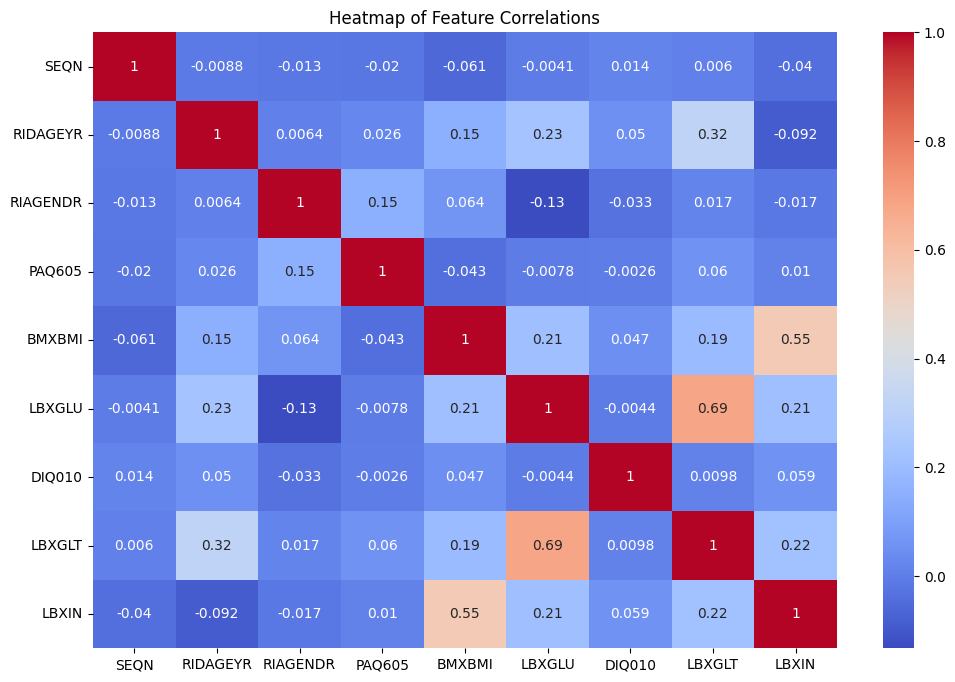

In [ ]:
# Visualization Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

In [ ]:
# # Data Preprocessing

# Ubah Feature Object Age Group Menjadi Int
df['age_group'] = df['age_group'].replace({'Adult': 0, 'Senior': 1})
df['age_group'] = df['age_group'].astype(int)

# Data Cleaning
# Handling Missing Value dengan nilai median dari tiap kolom
df.fillna(df.median(), inplace=True)

# # Normalization (Standardization of numerical features) (Tidak Digunakan)
# numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
# scaler = StandardScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Outlier Detection and Handling
# Here using Z-score; you might choose a different method depending on your data
z_scores = np.abs(stats.zscore(df[numerical_features]))
df = df[(z_scores < 3).all(axis=1)]

# # Feature Selection
# Drop the 'SEQN' column
df.drop(columns=['SEQN'], inplace=True)

df

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...
2273,0,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,0,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,0,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,0,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


#### Ringkasan Metode
Silahkan double click cell ini dan tulis ringkasan metode!

In [ ]:
# Baseline Model Random Forest

class SimpleDecisionTree:
    def __init__(self, max_depth=None):#Menginisialisasi pohon keputusan dengan parameter
        self.max_depth = max_depth #untuk membatasi kedalaman pohon.
        self.tree = {} #Menyiapkan struktur pohon

    def fit(self, X, y, depth=0): #Mencari pemisahan fitur secara acak untuk setiap node, membangun subtree kiri dan kanan, dan menyimpan struktur pohon.
        if len(set(y)) == 1 or (self.max_depth and depth == self.max_depth):
            self.tree = {'label': np.bincount(y).argmax()}
            return

        feature_idx = np.random.randint(0, X.shape[1])
        split_value = np.random.uniform(X[:, feature_idx].min(), X[:, feature_idx].max())

        left_idx = np.where(X[:, feature_idx] < split_value)[0]
        right_idx = np.where(X[:, feature_idx] >= split_value)[0]

        if len(left_idx) == 0 or len(right_idx) == 0:
            self.tree = {'label': np.bincount(y).argmax()}
            return

        left_subtree = SimpleDecisionTree(max_depth=self.max_depth)
        right_subtree = SimpleDecisionTree(max_depth=self.max_depth)

        left_subtree.fit(X[left_idx], y[left_idx], depth+1)
        right_subtree.fit(X[right_idx], y[right_idx], depth+1)

        self.tree = {'feature': feature_idx, 'split': split_value,
                     'left': left_subtree, 'right': right_subtree}

    def predict(self, X): #Melakukan prediksi dengan memeriksa node pohon dan melanjutkan di subtree yang sesuai berdasarkan fitur yang diberikan.
        if 'label' in self.tree:
            return self.tree['label']
        feature_val = X[self.tree['feature']]
        branch = self.tree['left'] if feature_val < self.tree['split'] else self.tree['right']
        return branch.predict(X)

class SimpleRandomForest:
    def __init__(self, n_trees=10, max_depth=None): #Menginisialisasi random forest dengan jumlah n trees pohon dan max depth untuk pohon tersebut
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y): #membuat ntrees pohon keputusan dengan bootstrapping data dan melatih setiap pohon dengan sampel data yang di-bootstrapped.
        for _ in range(self.n_trees):
            idxs = np.random.choice(len(X), size=len(X))
            bootstrap_X, bootstrap_y = X[idxs], y[idxs]

            tree = SimpleDecisionTree(max_depth=self.max_depth)
            tree.fit(bootstrap_X, bootstrap_y)
            self.trees.append(tree)

    def predict(self, X): #Melakukan prediksi untuk setiap sampel data dengan mengumpulkan prediksi dari setiap pohon dalam hutan dan mengambil mayoritas suara dari hasil prediksi pohon-pohon tersebut.
        tree_preds = np.array([tree.predict(x) for tree in self.trees for x in X])
        tree_preds = tree_preds.reshape(self.n_trees, X.shape[0])
        return np.array([np.bincount(tree_preds[:,i]).argmax() for i in range(X.shape[0])])


In [ ]:
# Model Exploration

X = df.drop('age_group', axis=1).values #Mengambil fitur-fitur dari dataframe 'df' kedlam variabel 'X' untuk digunakan dalam pemodelan
y = df['age_group'].values #Mengambil kolom target ('age_group') dari dataframe 'df' kedalam variabel 'y'

y = y.astype(np.int64) #Mengonversi tipe data kolom target menjadi 'np.int64'. mungkin diperlukan, bila tipe datanya tidak sesuai yang diharapkan oleh model.

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Membagi dataset menjadi data latih dan data uji dengan rasio 70:30 menggunakan split.

# Using the SimpleRandomForest model
rf = SimpleRandomForest(n_trees=10, max_depth=3) #membuat objek 'SimpleRandomForest' dengan 10 pohon dalam hutan dan kedalaman maksimum setiap pohon adalah 3.
rf.fit(X_train, y_train) #Melatih model hutan acak menggunakan data latih 'X_train dan Y_train' yang telah disiapkan sebelumnya.
predictions = rf.predict(X_test) #Menggunakan model yang telah dilatih untuk membuat prediksi terhadap data uji 'X_test' Hasil prediksi akan disimpan dalam variabel 'predictions'.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report #mengimpor fungsi yang akan digunakan untuk mengevaluasi kinerja model.

# Define different hyperparameter combinations
hyperparameters = [ #Mendefinisikan beberapa kombinasi hyperparameter untuk dilakukan eksperimen pada model hutan acak.
    {'n_trees': 5, 'max_depth': 3},
    {'n_trees': 20, 'max_depth': 5},
    {'n_trees': 100, 'max_depth': None}  # None implies no limit on the depth
]

# Iterate over each combination, train the model, and evaluate
for params in hyperparameters:
    # Initialize the SimpleRandomForest with current parameters
    rf = SimpleRandomForest(n_trees=params['n_trees'], max_depth=params['max_depth'])

    # Train the model
    rf.fit(X_train, y_train)

    # Make predictions and evaluate
    predictions = rf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, zero_division=0)

    print(f"Parameters: {params}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

Parameters: {'n_trees': 5, 'max_depth': 3}
Accuracy: 0.8362573099415205
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       572
           1       0.00      0.00      0.00       112

    accuracy                           0.84       684
   macro avg       0.42      0.50      0.46       684
weighted avg       0.70      0.84      0.76       684

Parameters: {'n_trees': 20, 'max_depth': 5}
Accuracy: 0.8362573099415205
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       572
           1       0.00      0.00      0.00       112

    accuracy                           0.84       684
   macro avg       0.42      0.50      0.46       684
weighted avg       0.70      0.84      0.76       684

Parameters: {'n_trees': 100, 'max_depth': None}
Accuracy: 0.8377192982456141
Classification Report:
              precision    recall  f1-score   support



In [ ]:
# Rekomendasi Imbalance In Dataset: The skewed results towards the adult group suggest that there might be an imbalance in the dataset, with more adults than seniors
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Oversampling Senior Group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
smote = SMOTE() #SMOTE adalah metode oversampling yang digunakan untuk menangani
#ketidakseimbangan kelas dalam dataset dengan membuat sampel sintetis dari kelas minoritas.

# Undersampling Adult Group
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)


In [ ]:
hyperparameters = [
    {'n_trees': 5, 'max_depth': 3},
    {'n_trees': 20, 'max_depth': 5},
    {'n_trees': 100, 'max_depth': None}  # None artinya gak ada limit dalam depth
]

# Iterasi untuk setiap kombinasi hyperparameter, train data, lalu evaluasi
for params in hyperparameters:
    # Initialize the SimpleRandomForest with current parameters
    rf = SimpleRandomForest(n_trees=params['n_trees'], max_depth=params['max_depth'])

    # Train model
    rf.fit(X_train, y_train)

    # Make predictions and evaluate
    predictions = rf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, zero_division=0)

    print(f"Parameters: {params}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

Parameters: {'n_trees': 5, 'max_depth': 3}
Accuracy: 0.8450292397660819
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       578
           1       0.00      0.00      0.00       106

    accuracy                           0.85       684
   macro avg       0.42      0.50      0.46       684
weighted avg       0.71      0.85      0.77       684

Parameters: {'n_trees': 20, 'max_depth': 5}
Accuracy: 0.8450292397660819
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       578
           1       0.00      0.00      0.00       106

    accuracy                           0.85       684
   macro avg       0.42      0.50      0.46       684
weighted avg       0.71      0.85      0.77       684

Parameters: {'n_trees': 100, 'max_depth': None}
Accuracy: 0.847953216374269
Classification Report:
              precision    recall  f1-score   support

 

# Hasil Dan Analisis

1. Analisis Parameter:
  - n_trees (Jumlah Pohon) yang digunakan adalah 5, 20, dan 100 pohon. Biasanya, meningkatkan jumlah pohon dalam Random Forest akan meningkatkan performa model hingga titik tertentu, karena mengurangi varians tanpa meningkatkan bias.
  - max_depth (Kedalaman Maksimum Pohon) yang digunakan bervariasi, dari 3, hingga 5, dan tidak terbatas. Kedalaman pohon mengontrol kompleksitas model. Pohon yang lebih dalam dapat menangkap pola yang lebih kompleks tetapi juga berisiko overfitting.

2. Ketiga pengaturan parameter menghasilkan akurasi yang tidak jauh berbeda yaitu:
   - 'n_trees': 5, 'max_depth': 3, Accuracy : 83.4%
   - 'n_trees': 20, 'max_depth': 5, Accuracy : 83.4%
   - 'n_trees': 100, 'max_depth': no limit, Accuracy : 84.9%

3. Pengaruh Jumlah Pohon (n_trees):

  Dalam kasus ini, saat jumlah pohonnya 5 dan 20, hasil akurasinya sama. Kemudian saat diubah jumlah pohonnya menjadi 100 memberikan sedikit peningkatan akurasi, tidak terlalu signifikan perbedaannya. Hal ini dapat menunjukkan bahwa dengan 5 pohon, model sudah cukup mampu untuk menangkap pola dalam data.

4. Pengaruh Kedalaman Maksimum (max_depth):

   Pada pengaturan kedalaman maksimum 3 dan 5, akurasi model hampir sama. Ini menunjukkan bahwa kedalaman maksimum 3 sudah cukup untuk menangkap pola dalam data, dan peningkatan kedalaman tidak memberikan keuntungan yang signifikan. Untuk penggunaan None untuk kedalaman maksimum (unlimited) menghasilkan akurasi yang lebih tinggi.


Konsistensi ini menunjukkan bahwa model ini stabil di seluruh konfigurasi ini. Model yang lebih sederhana dengan 5 pohon dan kedalaman 3 sudah cukup untuk mencapai akurasi yang tinggi. Ini menunjukkan efisiensi dalam penggunaan sumber daya komputasi tanpa pengorbanan pada performa model.




# Kesimpulan

Secara keseluruhan, hasil ini menggarisbawahi pentingnya mengevaluasi pengaruh parameter pada performa model. Hasil ini juga memberikan wawasan penting mengenai penggunaan model Random Forest dalam tugas klasifikasi: Kedalaman dan jumlah pohon yang tidak terlalu banyak bisa cukup untuk mencapai performa yang tinggi. Ini menekankan pentingnya pemilihan parameter yang bijaksana dan berdasarkan data dalam pembelajaran mesin.